# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [31]:
import pandas as pd
import numpy as np
import re

In [32]:
df = pd.read_csv('data/resale_flat_prices_from_2017.csv', delimiter=',')
print(df.head())

     month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1  2017-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2  2017-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3  2017-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4  2017-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_date     remaining_lease  \
0            44.0        Improved                 1979  61 years 04 months   
1            67.0  New Generation                 1978  60 years 07 months   
2            67.0  New Generation                 1980  62 years 05 months   
3            68.0  New Generation                 1980   62 years 01 month   
4            67.0  New Generation                 1980  62 years 05 months   

   resale_price  
0      232000.0  
1      250000.0  
2      262000.0  
3      265000.

In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192695 entries, 0 to 192694
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                192695 non-null  object 
 1   town                 192695 non-null  object 
 2   flat_type            192695 non-null  object 
 3   block                192695 non-null  object 
 4   street_name          192695 non-null  object 
 5   storey_range         192695 non-null  object 
 6   floor_area_sqm       192695 non-null  float64
 7   flat_model           192695 non-null  object 
 8   lease_commence_date  192695 non-null  int64  
 9   remaining_lease      192695 non-null  object 
 10  resale_price         192695 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 16.2+ MB
None


In [34]:
print(df.describe())

       floor_area_sqm  lease_commence_date  resale_price
count   192695.000000        192695.000000  1.926950e+05
mean        97.041553          1996.146288  5.052774e+05
std         24.039119            14.120676  1.763437e+05
min         31.000000          1966.000000  1.400000e+05
25%         82.000000          1985.000000  3.750000e+05
50%         93.000000          1996.000000  4.750000e+05
75%        112.000000          2011.000000  6.030000e+05
max        366.700000          2021.000000  1.588000e+06


In [35]:
print(df.isnull().sum())

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64


In [36]:
# Convert 'month' to datetime
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')

# Convert 'lease_commence_date' to datetime
df['lease_commence_date'] = pd.to_datetime(df['lease_commence_date'], format='%Y')

# Convert 'remaining_lease' to number of years
def parse_remaining_lease(lease_str):
    if pd.isnull(lease_str):
        return np.nan
    years = 0
    months = 0
    year_match = re.search(r'(\d+)\s+years?', lease_str)
    month_match = re.search(r'(\d+)\s+months?', lease_str)
    if year_match:
        years = int(year_match.group(1))
    if month_match:
        months = int(month_match.group(1))
    total_years = years + (months / 12)
    return round(total_years, 2)

df['remaining_lease_years'] = df['remaining_lease'].apply(parse_remaining_lease)

# Convert 'storey_range' into a numerical value by taking the average of the range: e.g. '01 to 03' -> 2
def get_average_storey(storey_range):
    floors = storey_range.split(' TO ')
    if len(floors) == 2:
        return (int(floors[0]) + int(floors[1])) / 2
    else:
        return np.nan

df['storey_level'] = df['storey_range'].apply(get_average_storey)

# Change the output format of 'month'
df['month'] = df['month'].dt.strftime('%d-%m-%Y')

# Change the output format of 'lease_commence_date'
df['lease_commence_date'] = df['lease_commence_date'].dt.strftime('%d-%m-%Y')

# Change 'Kallang/Whampoa' to 'Kallang'
df['town'] = df['town'].replace('Kallang/Whampoa', 'Kallang')

# Camelize the town and flat_type columns
df['town'] = df['town'].str.title()
df['flat_type'] = df['flat_type'].str.title()

# Add ID column
df['id'] = df.index + 1

# Reorder the columns
df = df[['id', 'month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'storey_level', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'remaining_lease', 'remaining_lease_years', 'resale_price']]

print(df.head())

   id       month        town flat_type block        street_name storey_range  \
0   1  01-01-2017  Ang Mo Kio    2 Room   406  ANG MO KIO AVE 10     10 TO 12   
1   2  01-01-2017  Ang Mo Kio    3 Room   108   ANG MO KIO AVE 4     01 TO 03   
2   3  01-01-2017  Ang Mo Kio    3 Room   602   ANG MO KIO AVE 5     01 TO 03   
3   4  01-01-2017  Ang Mo Kio    3 Room   465  ANG MO KIO AVE 10     04 TO 06   
4   5  01-01-2017  Ang Mo Kio    3 Room   601   ANG MO KIO AVE 5     01 TO 03   

   storey_level  floor_area_sqm      flat_model lease_commence_date  \
0          11.0            44.0        Improved          01-01-1979   
1           2.0            67.0  New Generation          01-01-1978   
2           2.0            67.0  New Generation          01-01-1980   
3           5.0            68.0  New Generation          01-01-1980   
4           2.0            67.0  New Generation          01-01-1980   

      remaining_lease  remaining_lease_years  resale_price  
0  61 years 04 months    

### Cleaning CPI data

In [37]:
import pandas as pd

# Load and clean CPI data
cpi_df = pd.read_csv('data/cpi.csv', delimiter=',', skiprows=10)
cpi_pivot_df = cpi_df.set_index('Data Series').T
relevant_columns = ['All Items', '    Accommodation']
cpi_pivot_df = cpi_pivot_df[relevant_columns]

# Trim whitespace from the index
cpi_pivot_df.index = cpi_pivot_df.index.str.strip()
# Convert the index to datetime format
cpi_pivot_df.index = pd.to_datetime(cpi_pivot_df.index, format='%Y %b')
cpi_pivot_df.index = cpi_pivot_df.index.strftime('%d-%m-%Y')

# Reset the index and rename columns
cpi_pivot_df.reset_index(inplace=True)
cpi_pivot_df.columns = ['month', 'all_items', 'accommodation']
print(cpi_pivot_df.head())

# Export the cleaned data to a new CSV file
cpi_pivot_df.to_csv('data/cleaned/cpi_cleaned.csv', index=False)

        month all_items accommodation
0  01-09-2024   116.864       114.679
1  01-08-2024    116.57       114.566
2  01-07-2024   116.328       114.813
3  01-06-2024   116.065       113.833
4  01-05-2024   116.316        113.66


### Adding Adjusted Resale Prices using CPI Data (Housing & Utilities: Accommodation)

In [38]:
# Set base CPI (assuming 2019=100)
base_cpi = 100

# Adjust the resale prices for inflation
def adjust_price(row):
    month = row['month']
    # Ensure we get the CPI row for the matching month
    cpi_row = cpi_pivot_df[cpi_pivot_df['month'] == month]
    if cpi_row.empty:
        return None
    cpi = cpi_row['accommodation'].values[0]
    return round(row['resale_price'] * (base_cpi / cpi), 0)

# Apply the adjustment function to calculate adjusted prices
df['adjusted_price'] = df.apply(adjust_price, axis=1)

# Drop rows with missing adjusted prices (September 2024 CPI data is missing)
df = df.dropna(subset=['adjusted_price'])

# Round the adjusted prices to the hundredth place
df['adjusted_price'] = df['adjusted_price'].round(-2)

# Reorder the columns
df = df[['id', 'month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'storey_level', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'remaining_lease', 'remaining_lease_years', 'resale_price', 'adjusted_price']]

print(df.head())

   id       month        town flat_type block        street_name storey_range  \
0   1  01-01-2017  Ang Mo Kio    2 Room   406  ANG MO KIO AVE 10     10 TO 12   
1   2  01-01-2017  Ang Mo Kio    3 Room   108   ANG MO KIO AVE 4     01 TO 03   
2   3  01-01-2017  Ang Mo Kio    3 Room   602   ANG MO KIO AVE 5     01 TO 03   
3   4  01-01-2017  Ang Mo Kio    3 Room   465  ANG MO KIO AVE 10     04 TO 06   
4   5  01-01-2017  Ang Mo Kio    3 Room   601   ANG MO KIO AVE 5     01 TO 03   

   storey_level  floor_area_sqm      flat_model lease_commence_date  \
0          11.0            44.0        Improved          01-01-1979   
1           2.0            67.0  New Generation          01-01-1978   
2           2.0            67.0  New Generation          01-01-1980   
3           5.0            68.0  New Generation          01-01-1980   
4           2.0            67.0  New Generation          01-01-1980   

      remaining_lease  remaining_lease_years  resale_price  adjusted_price  
0  61 yea

### Adding Region Data
`Region`

`Market Segment`

`Maturity`

In [39]:
import pandas as pd
region_df = pd.read_csv('data/region_data.csv', delimiter=',')

# Create the mappings
planning_area_mapping = dict(zip(region_df['town'], region_df['planning_area']))
planning_region_mapping = dict(zip(region_df['town'], region_df['planning_region']))
market_segment_mapping = dict(zip(region_df['town'], region_df['market_segment']))
maturity_mapping = dict(zip(region_df['town'], region_df['maturity']))

# Map the region data to the resale flat prices data
df['planning_area'] = df['town'].map(planning_area_mapping)
df['planning_region'] = df['town'].map(planning_region_mapping)
df['market_segment'] = df['town'].map(market_segment_mapping)
df['maturity'] = df['town'].map(maturity_mapping)

### Add Region Data for Central Area Town

In [40]:
import pandas as pd
central_region_df = pd.read_csv('data/central_region_data.csv', delimiter=',')

# Create the mappings from central_region_data.csv
central_planning_area_mapping = dict(zip(central_region_df['street_name'], central_region_df['planning_area']))
central_planning_region_mapping = dict(zip(central_region_df['street_name'], central_region_df['planning_region']))
central_market_segment_mapping = dict(zip(central_region_df['street_name'], central_region_df['market_segment']))
central_maturity_mapping = dict(zip(central_region_df['street_name'], central_region_df['maturity']))

# Function to fill missing values using central region mappings
def fill_missing_values(row, column, mapping):
    if pd.isnull(row[column]):
        return mapping.get(row['street_name'], row[column])
    return row[column]

# Apply the function to fill missing values
df['planning_area'] = df.apply(lambda row: fill_missing_values(row, 'planning_area', central_planning_area_mapping), axis=1)
df['planning_region'] = df.apply(lambda row: fill_missing_values(row, 'planning_region', central_planning_region_mapping), axis=1)
df['market_segment'] = df.apply(lambda row: fill_missing_values(row, 'market_segment', central_market_segment_mapping), axis=1)
df['maturity'] = df.apply(lambda row: fill_missing_values(row, 'maturity', central_maturity_mapping), axis=1)


### Export the cleaned resale flat prices data to a new CSV file

In [41]:
# Export the cleaned data to a new CSV file
df.to_csv('data/cleaned/resale_flat_prices_cleaned.csv', index=False)

<Axes: >

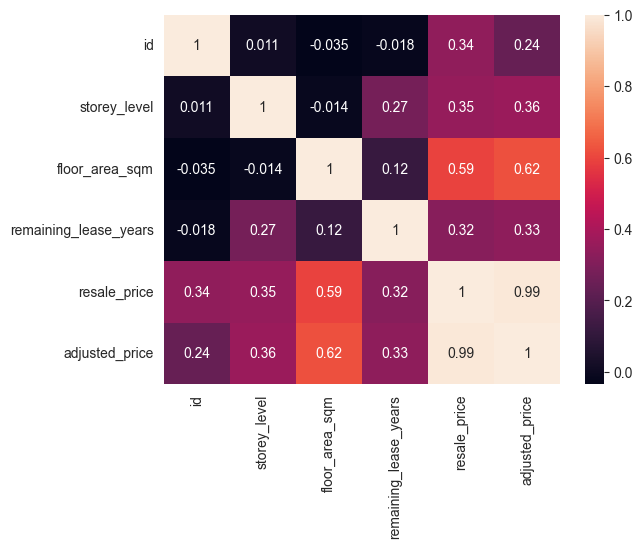

In [42]:
# Plot pearson correlation
import seaborn as sns

sns.heatmap(df.corr(numeric_only=True), annot=True)



In [43]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

# Assuming df is your DataFrame and you want to predict 'adjusted_price' using 'floor_area_sqm'
X = df[['floor_area_sqm']]  # Independent variable(s) 
y = df['adjusted_price']  # Dependent variable

# Create and fit the model 
model = LinearRegression()
model.fit(X, y)

# Calculate the Pearson correlation coefficient
# Flatten X to pass it to pearsonr as a 1D array
r_value, _ = pearsonr(X['floor_area_sqm'], y)
print(f'Pearson correlation coefficient (r value): {r_value}')

# Predict the values 
y_pred = model.predict(X)

# Calculate the R-squared value 
r2 = r2_score(y, y_pred)
print(f'R-squared value: {r2}')


Pearson correlation coefficient (r value): 0.6217643330055012
R-squared value: 0.3865908857977757


### Create Violin Plot for Flat Types

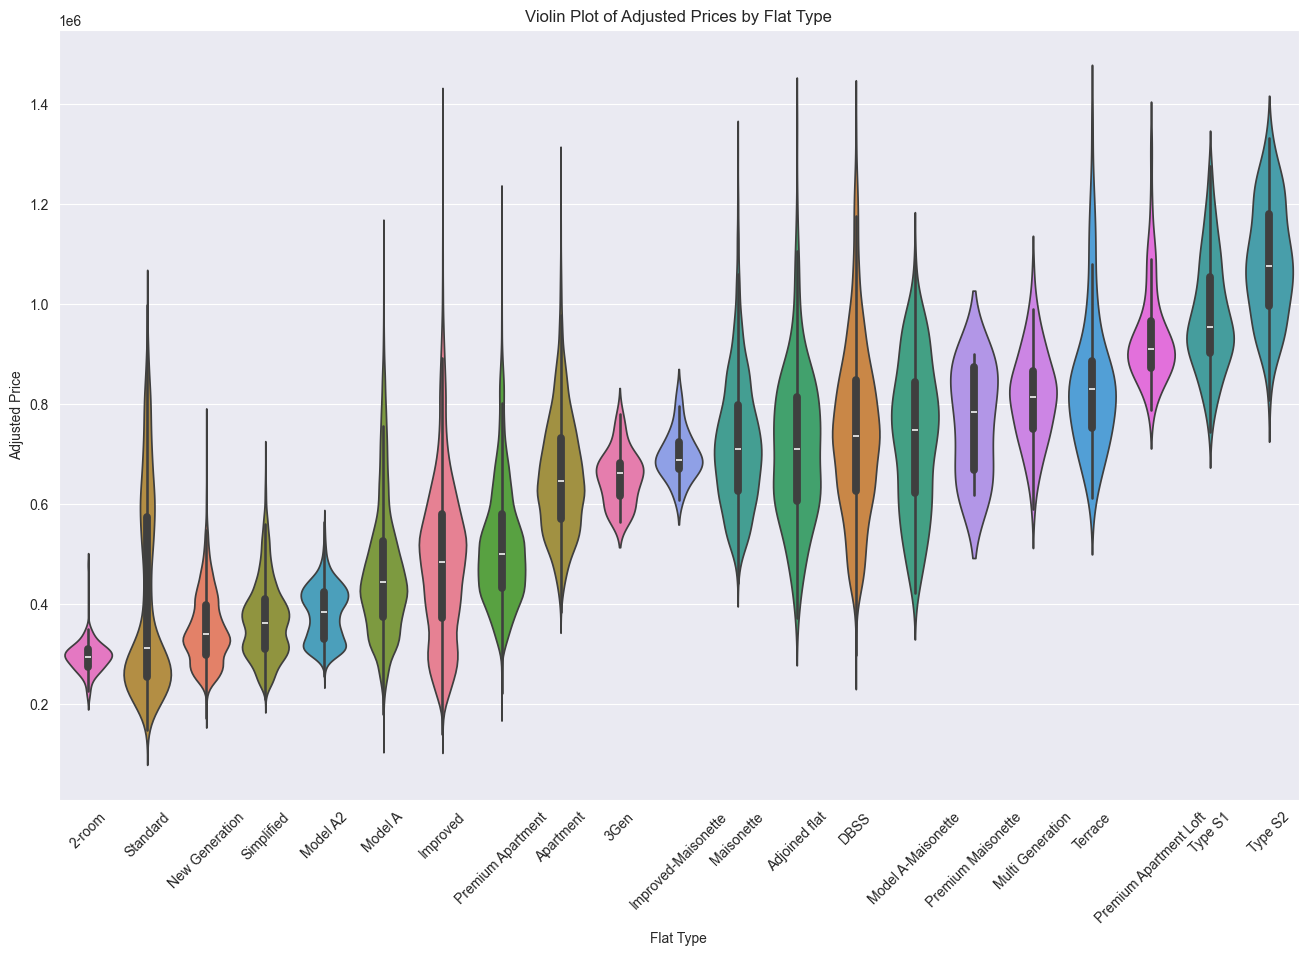

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# # Define the Tableau 20 colors (normalized to [0, 1] for Matplotlib)
# tableau_20 = [(r/255, g/255, b/255) for r, g, b in [
#     (31, 119, 180), (255, 127, 14), (44, 160, 44), (214, 39, 40),
#     (148, 103, 189), (140, 86, 75), (227, 119, 194), (127, 127, 127),
#     (188, 189, 34), (23, 190, 207), (174, 199, 232), (255, 187, 120),
#     (152, 223, 138), (255, 152, 150), (197, 176, 213), (196, 156, 148),
#     (247, 182, 210), (199, 199, 199), (219, 219, 141), (158, 218, 229)
# ]]

# Set the size of the plot
plt.figure(figsize=[16, 10])

# Sort by median of 'adjusted_price'
median_prices = df.groupby('flat_model')['adjusted_price'].median()
sorted_flat_models = median_prices.sort_values().index

p = sns.violinplot(x='flat_model', y='adjusted_price', data=df, hue='flat_model', dodge=False, legend=False, order=sorted_flat_models)

# ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
# p.set_yticklabels(ylabels)

# Set the title and labels
plt.title('Violin Plot of Adjusted Prices by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Adjusted Price')


# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Save the plot to a file
plt.savefig('violin_plot.svg', format='svg')

# Show the plot
plt.show()


### Create Pivot Table for Adjusted Flat Prices

In [45]:
# Get numerical columns
numerical_columns = ['adjusted_price', 'floor_area_sqm', 'storey_level', 'remaining_lease_years']
# Get non-numerical columns
non_numerical_columns = ['town', 'month', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model', 'lease_commence_date', 'remaining_lease', 'planning_area', 'planning_region', 'market_segment', 'maturity']

melt_df = df

# Drop the non-numerical columns
melt_df = melt_df.drop(columns=non_numerical_columns)

# Drop resale_price column
melt_df = melt_df.drop(columns=['resale_price'])

print(melt_df.head())

# Change the name of the numerical columns to CamelCase with Space
melt_df.columns = ['Id', 'Storey Level', 'Floor Area Sqm', 'Remaining Lease Years', 'Adjusted Price']

# Melt the dataframe to create a long-form table
melt_df = pd.melt(melt_df, id_vars=['Id'])

# Export the melted data to a new CSV file
melt_df.to_csv('data/cleaned/resale_flat_prices_pivot.csv', index=False)

   id  storey_level  floor_area_sqm  remaining_lease_years  adjusted_price
0   1          11.0            44.0                  61.33        219100.0
1   2           2.0            67.0                  60.58        236100.0
2   3           2.0            67.0                  62.42        247500.0
3   4           5.0            68.0                  62.08        250300.0
4   5           2.0            67.0                  62.42        250300.0


### Population Data Cleaning

In [46]:
import pandas as pd
# Define the consistent headers
headers = ['planning_area', 'sub_zone', 'floor_area_sqm', 'dwelling_count', 'period']

pop_2020_df = pd.read_csv('data/population_2011_to_2020.csv', delimiter=',', header=0 , names=headers)
pop_2021_df = pd.read_csv('data/population_2021.csv', delimiter=',', header=0 , names=headers)
pop_2022_df = pd.read_csv('data/population_2022.csv', delimiter=',', header=0 , names=headers)
pop_2023_df = pd.read_csv('data/population_2023.csv', delimiter=',', header=0 , names=headers)
pop_2024_df = pd.read_csv('data/population_2024.csv', delimiter=',', header=0 , names=headers)

# Concatenate all the population dataframes
pop_df = pd.concat([pop_2024_df, pop_2023_df, pop_2022_df, pop_2021_df, pop_2020_df], ignore_index=True)

# # Get unique values of Planning Area
# # Capitalize the Planning Area
# pop_df['PA'] = pop_df['PA'].str.upper()
# print(pop_df['PA'].unique())
# 
# # Filter out unwanted Planning Areas
# pop_df = pop_df[
#     ~pop_df['PA'].isin([
#         'SOUTHERN ISLANDS', 'NORTH-EASTERN ISLANDS', 'STRAITS VIEW', 
#         'WESTERN ISLANDS', 'CENTRAL WATER CATCHMENT', 'WESTERN WATER CATCHMENT'
#     ])
# ]
# 
# 
# # Tagging for town to planning area
# town_to_planning_area = {
#     'BEDOK': ['PAYA LEBAR'],
#     'KALLANG/WHAMPOA': ['KALLANG'],
#     'CENTRAL AREA': ['DOWNTOWN CORE', 'MARINA EAST', 'MARINA SOUTH', 'MUSEUM', 'NEWTON', 'NOVENA', 'ORCHARD', 'OUTRAM', 'RIVER VALLEY', 'ROCHOR', 'SINGAPORE RIVER', 'TANGLIN'],
#     'CHOA CHU KANG': ['SUNGEI KADUT'],
#     'BISHAN': ['MANDAI'],
#     'TAMPINES': ['CHANGI', 'CHANGI BAY'],
#     'BUKIT BATOK': ['TENGAH'],
#     'YISHUN': ['SIMPANG'],
#     'PUNGGOL': ['SELETAR'],
#     'JURONG WEST': ['PIONEER', 'LIM CHU KANG', 'TUAS', 'BOON LAY'],
# }
# 
# # Define a function to map PA to TOWN, using PA as the fallback if no match is found in the mapping
# def get_town(planning_area):
#     for town, areas in town_to_planning_area.items():
#         if planning_area in areas:
#             return town
#     return planning_area  # Fallback to PA if no mapping is found
# 
# # Apply the function to create the TOWN column
# pop_df['TOWN'] = pop_df['PA'].apply(get_town)
# 
# print(pop_df['TOWN'].unique())
# print(len(pop_df['TOWN'].unique()))
# 
# # Display the result to verify
# print(pop_df[['PA', 'TOWN']].head())


In [47]:
# Export the cleaned data to a new CSV file
pop_df.to_csv('data/cleaned/population_cleaned.csv', index=False)